# EDA for Carvana Classification Problem 

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
%matplotlib inline 

import matplotlib.pyplot as plt
pd.pandas.set_option('display.max_columns', None)

In [90]:
df = pd.read_csv('carvana_mba.csv')
#df = df.sample(frac = 0.3, random_state = 13)

In [91]:
df.shape

(67270, 32)

In [92]:
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,2009-12-07,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155,9829,11636,13600,7451,8552,11597,12409,21973,33619,FL,7100.0,0,1113
1,2,0,2009-12-07,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854,8383,10897,12572,7456,9222,11374,12791,19638,33619,FL,7600.0,0,1053
2,3,0,2009-12-07,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202,4760,6943,8457,4035,5557,7146,8702,19638,33619,FL,4900.0,0,1389
3,4,0,2009-12-07,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893,2675,4658,5690,1844,2646,4375,5518,19638,33619,FL,4100.0,0,630
4,5,0,2009-12-07,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2,Covers,69367,AMERICAN,COMPACT,FORD,3913,5054,7723,8707,3247,4384,6739,7911,19638,33619,FL,4000.0,0,1020


In [93]:
df.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000
mean,36344.861290,0.095630,2005.352966,4.168485,1.493251,71727.835543,6164.700818,7414.887127,8542.039899,9899.771845,6168.741029,7431.972187,8820.813587,10192.698023,26454.859967,58255.647629,6755.693426,0.025033,1278.803196
std,20932.365698,0.294085,1.727841,1.707595,0.521212,14396.937346,2458.874187,2721.127550,3159.118697,3389.425324,2431.857758,2683.422636,3091.584354,3310.765402,25939.263304,26123.753189,1746.197418,0.156228,579.053723
min,1.000000,0.000000,2001.000000,0.000000,1.000000,5368.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1400.000000,0.000000,462.000000
25%,18272.250000,0.000000,2004.000000,3.000000,1.000000,62149.000000,4311.000000,5457.000000,6319.000000,7528.250000,4311.000000,5469.000000,6565.000000,7825.000000,17212.000000,32124.000000,5470.000000,0.000000,853.000000
50%,36386.500000,0.000000,2005.000000,4.000000,1.000000,73527.500000,6163.000000,7381.000000,8498.000000,9870.000000,6130.000000,7390.000000,8811.000000,10177.000000,19662.000000,74135.000000,6750.000000,0.000000,1169.000000
75%,54241.750000,0.000000,2007.000000,5.000000,2.000000,82529.750000,7807.750000,9050.000000,10711.750000,12156.000000,7777.000000,9045.000000,10975.000000,12376.000000,22808.000000,80022.000000,7915.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,40308.000000,35722.000000,36859.000000,39080.000000,40308.000000,99761.000000,99224.000000,35900.000000,1.000000,7498.000000


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67270 entries, 0 to 67269
Data columns (total 32 columns):
RefId                                67270 non-null int64
IsBadBuy                             67270 non-null int64
PurchDate                            67270 non-null object
Auction                              67270 non-null object
VehYear                              67270 non-null int64
VehicleAge                           67270 non-null int64
Make                                 67270 non-null object
Model                                67270 non-null object
Trim                                 67270 non-null object
SubModel                             67270 non-null object
Color                                67270 non-null object
Transmission                         67270 non-null object
WheelTypeID                          67270 non-null int64
WheelType                            67270 non-null object
VehOdo                               67270 non-null int64
Nationality 

In [95]:
# Check for null values --> None found
df.isnull().sum()

RefId                                0
IsBadBuy                             0
PurchDate                            0
Auction                              0
VehYear                              0
VehicleAge                           0
Make                                 0
Model                                0
Trim                                 0
SubModel                             0
Color                                0
Transmission                         0
WheelTypeID                          0
WheelType                            0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPric

# Visualizations

**1. Inspect Continuous Variables**

In [96]:
continuous_vars = df[['VehOdo','MMRAcquisitionAuctionAveragePrice',
     'MMRAcquisitionAuctionCleanPrice',
     'MMRAcquisitionRetailAveragePrice',
     'MMRAcquisitonRetailCleanPrice',
     'MMRCurrentAuctionAveragePrice',
     'MMRCurrentAuctionCleanPrice',
     'MMRCurrentRetailAveragePrice',
     'MMRCurrentRetailCleanPrice',
     'WarrantyCost']]

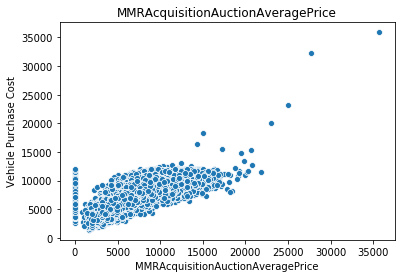

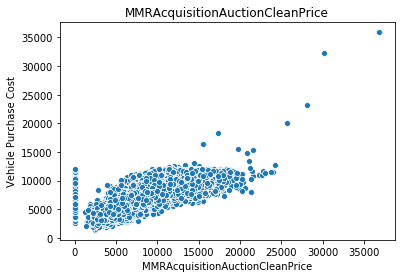

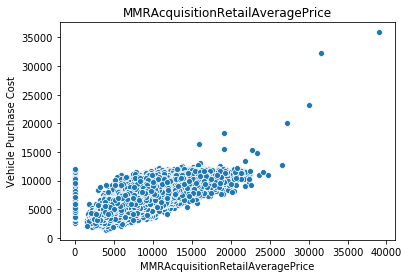

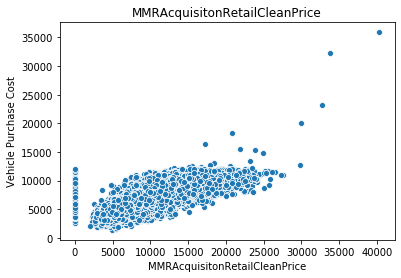

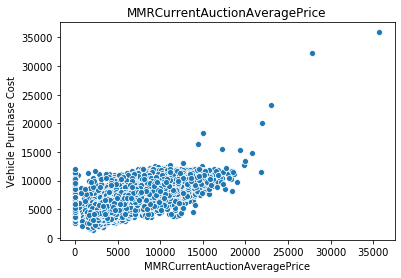

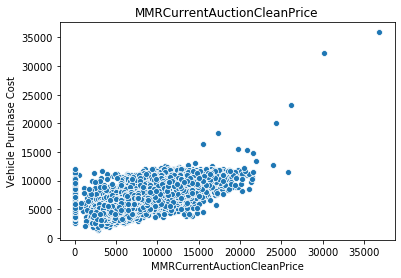

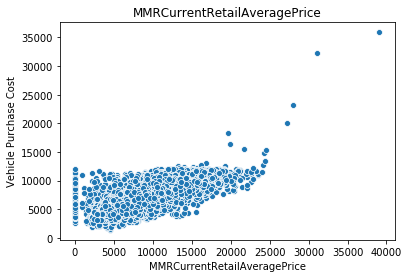

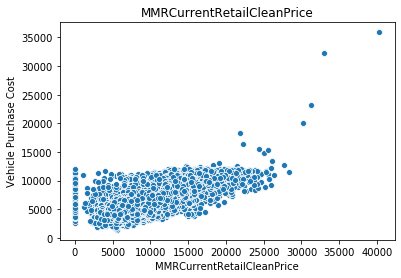

In [97]:
def plot_continuous(dfa,var):
    dfa = dfa.copy()
    
    sns.scatterplot(data = dfa, x = var , y = 'VehBCost')
    plt.title(var)
    plt.xlabel(var)
    plt.ylabel('Vehicle Purchase Cost')
    plt.show()

for var in continuous_vars:
    plot_continuous(df, var )  

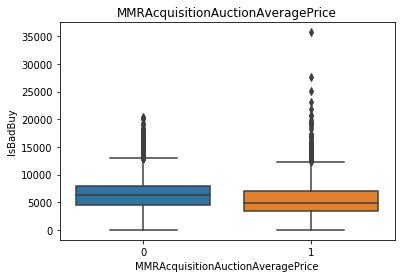

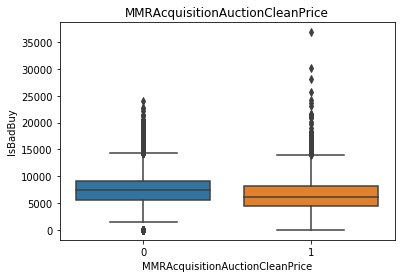

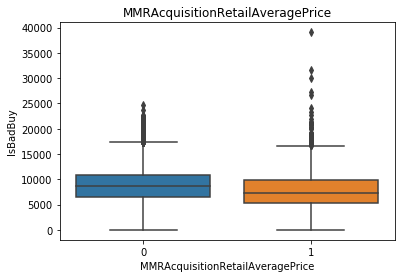

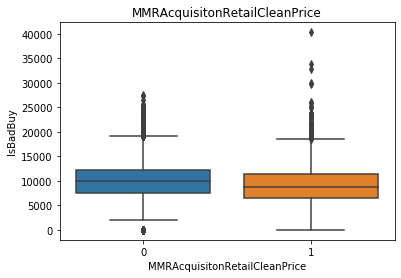

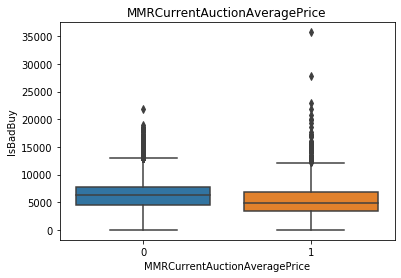

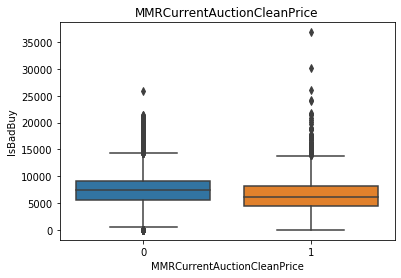

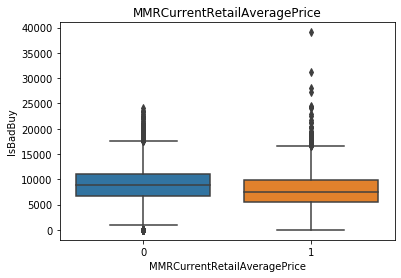

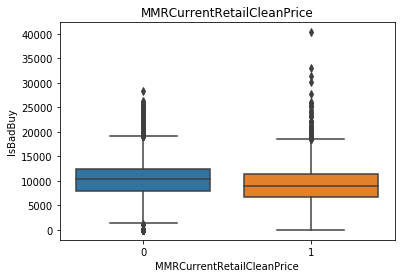

In [101]:
def boxplot_continuous(dfa,var):
    dfa = dfa.copy()
    
    sns.boxplot(data = dfa, x ='IsBadBuy', y = var)
    plt.title(var)
    plt.xlabel(var)
    plt.ylabel('IsBadBuy')
    plt.show()

for var in continuous_vars:
    boxplot_continuous(df, var ) 

**2. Inspect Categorical Variables**

In [121]:
cat_vars = df[['VehYear','VehicleAge','Make','Model','Trim','SubModel',
                  'Color','Nationality','Size','TopThreeAmericanName',
                  'Transmission','WheelTypeID','WheelType','IsOnlineSale',
                 'VNST']]

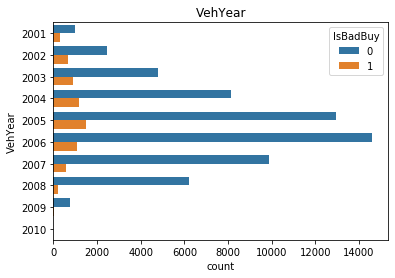

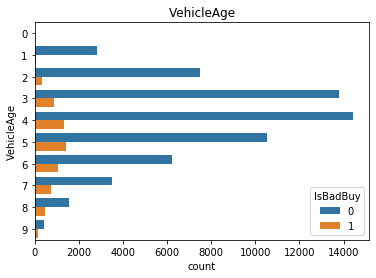

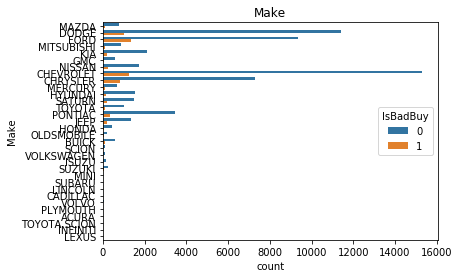

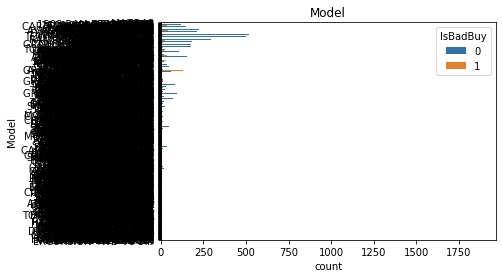

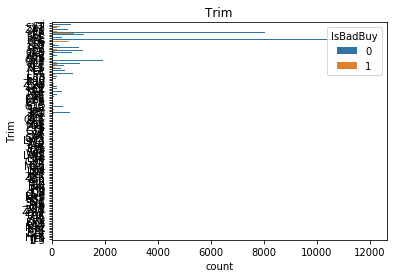

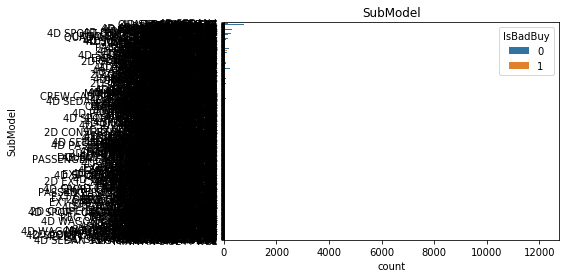

In [ ]:
def plot_categorical(dfa,var):
    dfa = dfa.copy()
    
    sns.countplot(data = dfa, y = var, hue ='IsBadBuy')
    plt.title(var)
    plt.show()

for var in cat_vars:
    plot_categorical(df, var ) 

**Experimental Code**

In [ ]:
#sns.countplot(data = df, y = 'Size', hue = 'IsBadBuy')

In [50]:
#cols = df.columns.array
#num_vars = []
#cat_vars = []

#for x in cols:
#    if df[x].dtype == 'int64':
#        num_vars.append(x)
#    elif df[x].dtype == 'float64':
#        num_vars.append(x)
#    else:
#       cat_vars.append(x)

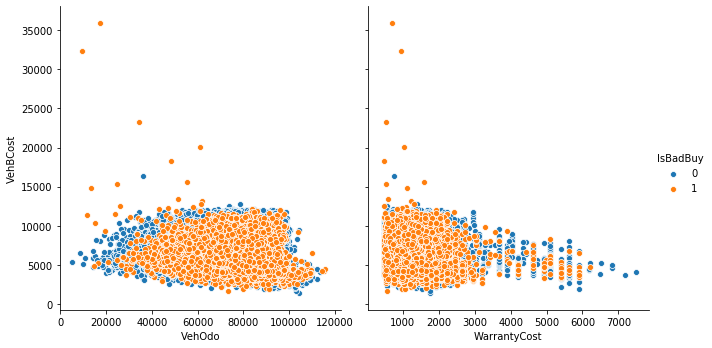

In [77]:
# Alternative plotting syntax
#sns.pairplot(data = df, x_vars = ['VehOdo', 'WarrantyCost'], y_vars = 'VehBCost',
#             hue='IsBadBuy', size = 5, aspect = 0.9)